In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os

In [2]:
kmin=0.08
kmax=0.16
grid = 128

#theta = np.linspace(0, np.pi, 50)
k_range = np.linspace(kmin, kmax, 50)
k_range = k_range /2
print(k_range)

[0.04       0.04081633 0.04163265 0.04244898 0.04326531 0.04408163
 0.04489796 0.04571429 0.04653061 0.04734694 0.04816327 0.04897959
 0.04979592 0.05061224 0.05142857 0.0522449  0.05306122 0.05387755
 0.05469388 0.0555102  0.05632653 0.05714286 0.05795918 0.05877551
 0.05959184 0.06040816 0.06122449 0.06204082 0.06285714 0.06367347
 0.0644898  0.06530612 0.06612245 0.06693878 0.0677551  0.06857143
 0.06938776 0.07020408 0.07102041 0.07183673 0.07265306 0.07346939
 0.07428571 0.07510204 0.07591837 0.07673469 0.07755102 0.07836735
 0.07918367 0.08      ]


# read in

In [15]:

# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/folded/'

# Define the file name you want to read
file_name = 'Bk1.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", df)

Loaded DataFrame:
               Bk          Bk_2          Bk_3          Bk_4          Bk_5  \
0   4.449695e+08  3.368116e+08  2.780447e+08  4.065155e+08  2.731917e+08   
1   4.866612e+08  2.814213e+08  3.314735e+08  3.827418e+08  3.571156e+08   
2   4.257600e+08  3.288258e+08  3.093000e+08  3.795401e+08  4.358279e+08   
3   3.940471e+08  3.213459e+08  4.315114e+08  3.749703e+08  4.526712e+08   
4   5.265977e+08  3.159956e+08  4.115310e+08  3.715722e+08  4.374176e+08   
5   4.733109e+08  2.959470e+08  3.892505e+08  3.221258e+08  4.485736e+08   
6   4.134460e+08  2.598805e+08  3.836148e+08  3.489010e+08  3.086939e+08   
7   4.697310e+08  2.480823e+08  3.421862e+08  3.003042e+08  2.236509e+08   
8   3.823444e+08  3.308084e+08  3.736228e+08  3.000819e+08  2.126732e+08   
9   3.258622e+08  2.625263e+08  3.139951e+08  2.111765e+08  2.415174e+08   
10  3.058697e+08  2.399861e+08  2.897288e+08  1.798499e+08  1.433666e+08   
11  2.202091e+08  2.365924e+08  2.183280e+08  1.634393e+08  1.475977e

Raw Bk v theta

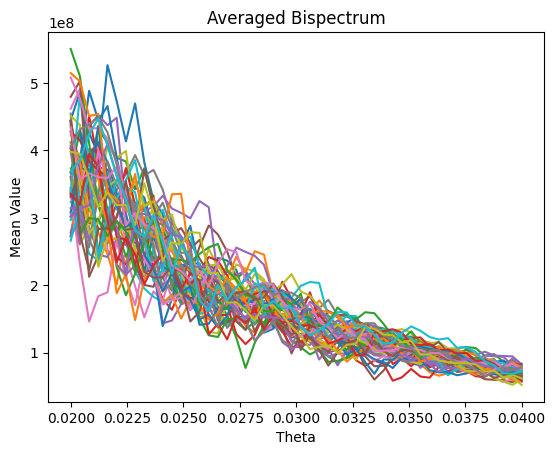

In [16]:

plt.plot(k_range,df)
plt.title('Averaged Bispectrum')
plt.xlabel('Theta')
plt.ylabel('Mean Value')
plt.show()

In [17]:
#read in real space
# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/folded/'

# Define the file name you want to read
file_name = 'Bk_real1.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    df_real = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", df_real)


Loaded DataFrame:
               Bk          Bk_2          Bk_3          Bk_4          Bk_5  \
0   2.692136e+08  2.005147e+08  1.959280e+08  2.487152e+08  1.572148e+08   
1   2.975631e+08  1.554491e+08  2.119654e+08  2.279648e+08  2.079739e+08   
2   2.588328e+08  1.813518e+08  1.928557e+08  2.311948e+08  2.493426e+08   
3   2.365707e+08  1.728898e+08  2.505162e+08  2.333792e+08  2.644963e+08   
4   3.126793e+08  1.934083e+08  2.476600e+08  2.247696e+08  2.576674e+08   
5   2.781338e+08  1.765857e+08  2.365076e+08  1.936351e+08  2.697148e+08   
6   2.438542e+08  1.625719e+08  2.338552e+08  2.115712e+08  1.947980e+08   
7   2.815517e+08  1.483972e+08  1.997309e+08  1.875857e+08  1.413173e+08   
8   2.404724e+08  2.040083e+08  2.154081e+08  1.944393e+08  1.367095e+08   
9   2.108667e+08  1.602820e+08  1.935645e+08  1.304201e+08  1.520353e+08   
10  1.960652e+08  1.570808e+08  1.841448e+08  1.112349e+08  9.692218e+07   
11  1.419493e+08  1.587088e+08  1.414823e+08  9.728192e+07  9.438320e

# Avg Bk

In [27]:
# Calculate the row means
avg = df.mean(axis=1)
avg_df = avg.to_frame(name='Average')  # Convert Series to DataFrame

# calc row std
std = df.std(axis=1)
avg_df['Standard Deviation'] = std

# Generate theta values
#theta = np.linspace(0, np.pi, 100)  # Ensure the length matches the number of rows

# Add the theta column to the DataFrame
avg_df['k'] = np.array(k_range)


# Display the final DataFrame
print(avg_df)

#save into csv
folder_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/folded/'
file_name = 'Bk_avg1.csv'

avg_df.to_csv(folder_path + file_name)




         Average  Standard Deviation         k
0   3.814532e+08        6.812922e+07  0.040000
1   3.613755e+08        7.268924e+07  0.040816
2   3.434256e+08        6.998925e+07  0.041633
3   3.414565e+08        6.930163e+07  0.042449
4   3.328703e+08        6.397253e+07  0.043265
5   3.112301e+08        5.929056e+07  0.044082
6   2.949654e+08        5.395125e+07  0.044898
7   2.856784e+08        5.699477e+07  0.045714
8   2.733522e+08        5.088953e+07  0.046531
9   2.686720e+08        4.366686e+07  0.047347
10  2.433792e+08        4.749957e+07  0.048163
11  2.336492e+08        4.052980e+07  0.048980
12  2.194467e+08        3.833411e+07  0.049796
13  2.108053e+08        3.553748e+07  0.050612
14  1.992933e+08        3.553339e+07  0.051429
15  1.950932e+08        3.798398e+07  0.052245
16  1.870416e+08        3.483359e+07  0.053061
17  1.882338e+08        2.896802e+07  0.053878
18  1.806657e+08        2.969121e+07  0.054694
19  1.739308e+08        3.040354e+07  0.055510
20  1.745415e

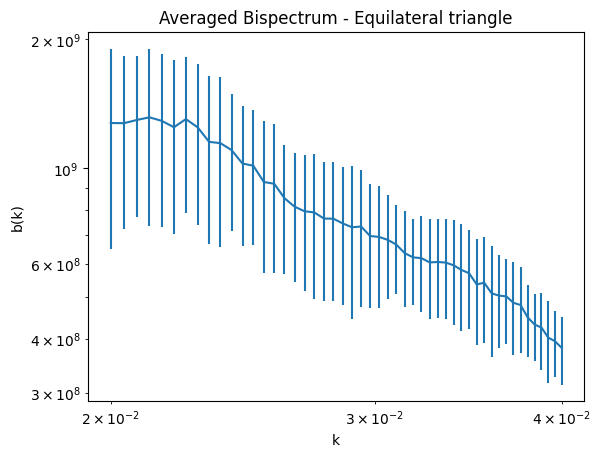

In [8]:
plt.errorbar(avg_df['k'], avg_df['Average'],yerr=avg_df['Standard Deviation'], marker='', linestyle='-')
plt.title('Averaged Bispectrum - Equilateral triangle')
plt.xlabel('k')
plt.ylabel('b(k)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [28]:
#average real space
# Calculate the row means
avg_real = df_real.mean(axis=1)
std_real = df_real.std(axis=1)


avg_df['Average real'] = avg_real
avg_df['Std real'] = std_real



# Display the final DataFrame
print(avg_df)

#save into csv
folder_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/folded/'
file_name = 'Bk_avg1.csv'

avg_df.to_csv(folder_path + file_name)

         Average  Standard Deviation         k  Average real      Std real
0   3.814532e+08        6.812922e+07  0.040000  2.303134e+08  4.373355e+07
1   3.613755e+08        7.268924e+07  0.040816  2.181648e+08  4.653247e+07
2   3.434256e+08        6.998925e+07  0.041633  2.088252e+08  4.547065e+07
3   3.414565e+08        6.930163e+07  0.042449  2.072006e+08  4.484284e+07
4   3.328703e+08        6.397253e+07  0.043265  2.039679e+08  4.119229e+07
5   3.112301e+08        5.929056e+07  0.044082  1.914029e+08  3.634586e+07
6   2.949654e+08        5.395125e+07  0.044898  1.807397e+08  3.599548e+07
7   2.856784e+08        5.699477e+07  0.045714  1.747174e+08  3.775481e+07
8   2.733522e+08        5.088953e+07  0.046531  1.678375e+08  3.244078e+07
9   2.686720e+08        4.366686e+07  0.047347  1.665694e+08  2.811943e+07
10  2.433792e+08        4.749957e+07  0.048163  1.503540e+08  3.090557e+07
11  2.336492e+08        4.052980e+07  0.048980  1.456043e+08  2.584939e+07
12  2.194467e+08        3

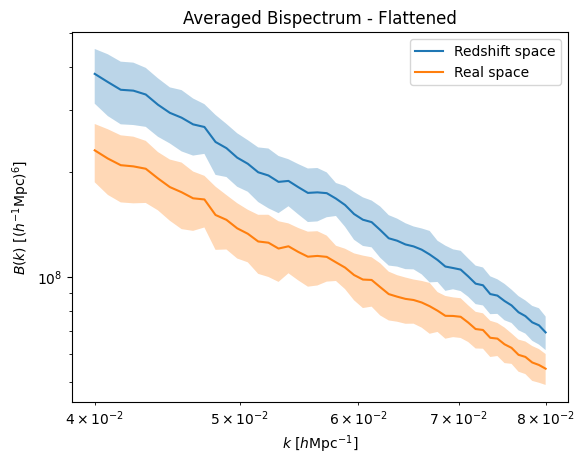

In [29]:
# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# Plot the average line for Real space
plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# Shaded region for the error in Real space
plt.fill_between(avg_df['k'], 
                 avg_df['Average real'] - avg_df['Std real'], 
                 avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)

# Set the title and axis labels
plt.title('Averaged Bispectrum - Flattened')
plt.xlabel(r'$k~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')

# Set the scales to logarithmic
plt.xscale('log')
plt.yscale('log')

# Show the legend and the plot
plt.legend()
plt.show()

# read in the theory bk

In [14]:


# file_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space/theory/'
# file_name = f'theory_equal.h5'

# # Load DataFrame and metadata from HDF5
# with pd.HDFStore(file_path + file_name) as store:
#     theory_df = store['theory_df']
#     metadata = store.get_storer('theory_df').attrs.metadata

# # Attach metadata to DataFrame
# theory_df.attrs = metadata

# # Verify metadata
# print(theory_df)
# print(theory_df.attrs['k1'])
# print(theory_df.attrs['k2'])

              Bk     Theta
0   3.689882e+09  0.000000
1   3.688193e+09  0.031733
2   3.683132e+09  0.063467
3   3.674715e+09  0.095200
4   3.662969e+09  0.126933
..           ...       ...
95  6.019788e+09  3.014660
96  6.132417e+09  3.046393
97  6.214942e+09  3.078126
98  6.265786e+09  3.109859
99  6.282910e+09  3.141593

[100 rows x 2 columns]
0.08
0.04


In [3]:
#LOAD IN ALREADY AVERAED Bk

df_path = '/home/gremlin/Msc Project/Bk_tables/redshift_space_new/folded/'
file_name = 'Bk_avg1.csv'


# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    avg_df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", avg_df)

Loaded DataFrame:
     Unnamed: 0       Average  Standard Deviation         k  Average real  \
0            0  3.814532e+08        6.812922e+07  0.040000  2.303134e+08   
1            1  3.613755e+08        7.268924e+07  0.040816  2.181648e+08   
2            2  3.434256e+08        6.998925e+07  0.041633  2.088252e+08   
3            3  3.414565e+08        6.930163e+07  0.042449  2.072006e+08   
4            4  3.328703e+08        6.397253e+07  0.043265  2.039679e+08   
5            5  3.112301e+08        5.929056e+07  0.044082  1.914029e+08   
6            6  2.949654e+08        5.395125e+07  0.044898  1.807397e+08   
7            7  2.856784e+08        5.699477e+07  0.045714  1.747174e+08   
8            8  2.733522e+08        5.088953e+07  0.046531  1.678375e+08   
9            9  2.686720e+08        4.366686e+07  0.047347  1.665694e+08   
10          10  2.433792e+08        4.749957e+07  0.048163  1.503540e+08   
11          11  2.336492e+08        4.052980e+07  0.048980  1.456043e

In [4]:
# Define the path where the CSV files are stored
df_path = '/home/gremlin/Msc Project/Bk_tables/theory/sigma/'

# Define the file name you want to read
file_name = 'Theory_flat_0.08_0.16.csv'  # Replace 'Bk.csv' with the actual file name if different

# Construct the full file path
file_path = os.path.join(df_path, file_name)

if os.path.exists(file_path):
    # Load the CSV into a DataFrame
    theory_df = pd.read_csv(file_path)
    print("Loaded DataFrame:\n", theory_df)

Loaded DataFrame:
     Unnamed: 0        k3     Theta  Bk_norm_sigma5  Bk_norm_sigma4  \
0            0  0.040000  2.636232    3.952610e+08    1.435408e+09   
1            1  0.040816  2.636232    3.746736e+08    1.361970e+09   
2            2  0.041633  2.636232    3.549165e+08    1.291432e+09   
3            3  0.042449  2.636232    3.360207e+08    1.223912e+09   
4            4  0.043265  2.636232    3.180939e+08    1.159808e+09   
5            5  0.044082  2.636232    3.011052e+08    1.099014e+09   
6            6  0.044898  2.636232    2.851379e+08    1.041841e+09   
7            7  0.045714  2.636232    2.702079e+08    9.883571e+08   
8            8  0.046531  2.636232    2.562679e+08    9.383976e+08   
9            9  0.047347  2.636232    2.433298e+08    8.920152e+08   
10          10  0.048163  2.636232    2.314436e+08    8.494033e+08   
11          11  0.048980  2.636232    2.205049e+08    8.101883e+08   
12          12  0.049796  2.636232    2.104676e+08    7.742110e+08   
1

note:

- avg_df : 50 Qsims avergae
- df: theory df

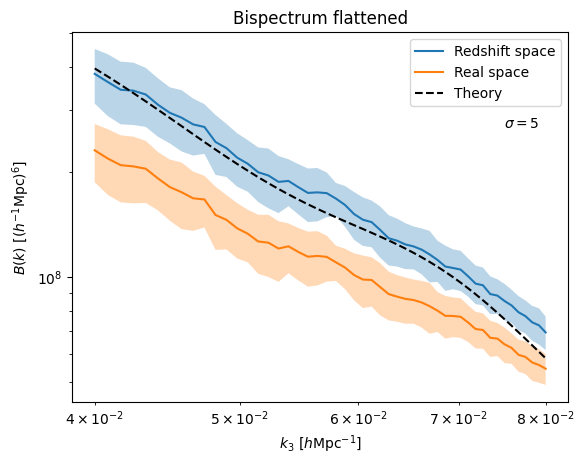

In [7]:
#plt.plot(avg_df['Theta'], avg_df['Average'], marker='', linestyle='-', color='b')
#Title = 'Bispectrum fixed' + r' $ k_1 = $ ' + str(k1) + r' $ k_2 = $' + str(k2)
#file_path = '/home/gremlin/Msc Project/plots/fin/'
#file_name = f'Averaged_Bispectrum_{grid}_k1_{k1}_k2_{k2}.png'

Title = 'Bispectrum flattened'

sigma =5


# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# Plot the average line for Real space
plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# Shaded region for the error in Real space
plt.fill_between(avg_df['k'], 
                 avg_df['Average real'] - avg_df['Std real'], 
                 avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)


plt.figtext(0.8, 0.68, f'$\sigma = {sigma}$')


plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma5'], marker='', linestyle='--', color='black', label='Theory')
plt.title(Title)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_3~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')  # Adjust units if necessary
plt.legend()
#plt.savefig(file_path + file_name)
plt.show()

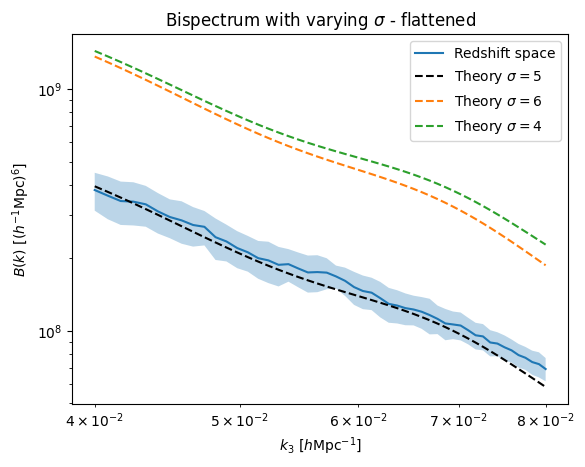

In [6]:

Title = f'Bispectrum with varying $\sigma$ - flattened'




# Plot the average line for Redshift space
plt.plot(avg_df['k'], avg_df['Average'], linestyle='-', label='Redshift space')

# Shaded region for the error in Redshift space
plt.fill_between(avg_df['k'], 
                 avg_df['Average'] - avg_df['Standard Deviation'], 
                 avg_df['Average'] + avg_df['Standard Deviation'], alpha=0.3)

# # Plot the average line for Real space
# plt.plot(avg_df['k'], avg_df['Average real'], linestyle='-', label='Real space')

# # Shaded region for the error in Real space
# plt.fill_between(avg_df['k'], 
#                  avg_df['Average real'] - avg_df['Std real'], 
#                  avg_df['Average real'] + avg_df['Std real'],  alpha=0.3)




plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma5'], marker='', linestyle='--', color='black', label=f'Theory $\sigma = 5$')
plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma6'], marker='', linestyle='--', label=f'Theory $\sigma = 6$')
plt.plot(theory_df['k3'], theory_df['Bk_norm_sigma4'], marker='', linestyle='--', label=f'Theory $\sigma = 4$')


plt.title(Title)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_3~[h{\rm Mpc}^{-1}]$')
plt.ylabel(r'$B(k)~[(h^{-1}{\rm Mpc})^6]$')  # Adjust units if necessary
plt.legend()
#plt.savefig(file_path + file_name)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

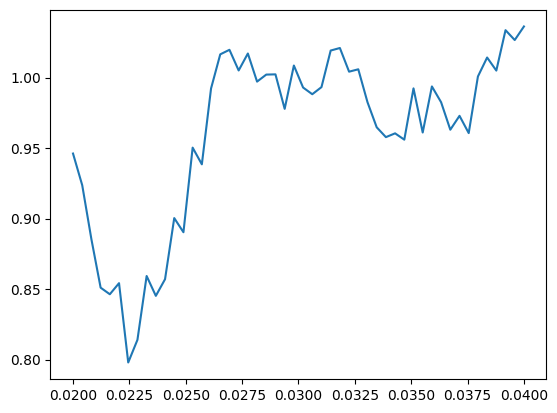

In [13]:
x = avg_df['Average'] / theory_df['Bk_norm']

plt.plot(avg_df['k'], 1/x)
plt.show

# Data Ablaysis

In [11]:
observed_avg = avg_df['Average']
expected = theory_df['Bk_norm_sigma5']
std = avg_df['Standard Deviation']

#print(observed_avg)
# print(expected)
# print(std)


chi = ((observed_avg - expected)**2)/((std/np.sqrt(len(observed_avg)))**2)
#chi = ((observed_avg - expected)**2)/((std)**2)


sum_chi = sum(chi)

dof = len(observed_avg)

print("---------------")
print(sum_chi)

print(sum_chi/dof)

---------------
964.8964694146168
19.297929388292335


SNR = 0     5.598966
1     4.971513
2     4.906834
3     4.927107
4     5.203331
5     5.249236
6     5.467257
7     5.012361
8     5.371482
9     6.152767
10    5.123820
11    5.764874
12    5.724581
13    5.931915
14    5.608621
15    5.136198
16    5.369575
17    6.497985
18    6.084821
19    5.720744
20    5.734625
21    6.812410
22    9.225346
23    7.465674
24    6.398555
25    6.295704
26    6.529695
27    5.966217
28    6.070860
29    6.371212
30    6.649320
31    7.116051
32    6.655734
33    5.948876
34    7.406727
35    6.754227
36    7.635820
37    7.567553
38    7.949380
39    7.916757
40    8.022010
41    8.049402
42    8.803842
43    8.369614
44    9.139240
45    8.909525
46    9.181916
47    8.718739
48    8.383593
49    9.069037
dtype: float64


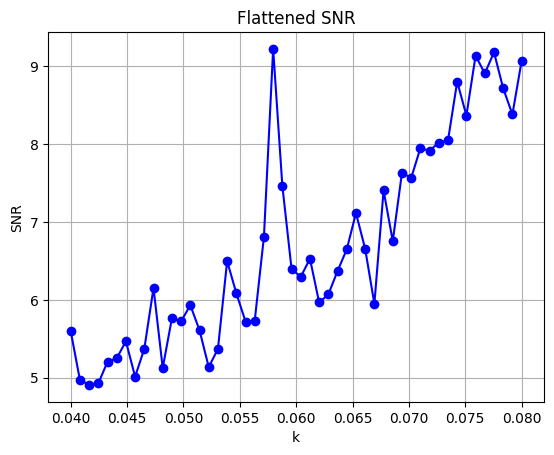

In [13]:
#SNR test

snr = avg_df['Average']/avg_df['Standard Deviation']

print(f'SNR = {snr}')

# Assuming 'snr' is a pandas Series with SNR values for each bin
#plt.figure(figsize=(10, 6))
plt.plot(avg_df['k'],snr, marker='o', linestyle='-', color='b')
plt.title('Flattened SNR')
plt.xlabel(r'k')
plt.ylabel('SNR')
plt.grid(True)
plt.show()

In [14]:
# Example SNR values (as a list or numpy array)
snr = snr

# Calculate the sum in quadrature
snr_total = np.sqrt(np.sum(snr**2))

# Print the result
print("Total SNR (sum in quadrature):", snr_total)

Total SNR (sum in quadrature): 48.29267907139371
